In [1]:
import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

from tifffile import imread, imsave

%reload_ext autoreload
%autoreload 2

from kymographs import KymoSpider

Populating the interactive namespace from numpy and matplotlib


# Loading data
_Note:_ The example below loads multiple exportet stacks and concatenates them. At the end the only variable that need to be set to something meaningful have to be `stack`, `seg`, and `flow`. The data for these variables you can generate as can be seen in `TimeLapseData2d` at the very bottom. (This was true when I wrote this text... ;)

In [2]:
folder = '/Users/markslabodnick/Dropbox/ProjectGoldstein/Slippage_Test_Films/Uncoupled_Calibration/export/'

stack1 = imread(folder+'stack01.tiff')
stack1 = np.swapaxes(stack1,1,0)
#stack2 = imread(folder+'stack02.tiff')
#stack2 = np.swapaxes(stack2,1,0)
#stack = np.concatenate([stack1,stack2],axis=1)
stack = stack1

seg1 = imread(folder+'seg01.tiff')
#seg2 = imread(folder+'seg02.tiff')
#seg = np.concatenate([seg1,seg2])
seg = seg1


flow1 = imread(folder+'flow01.tiff')
flow1 = np.swapaxes(flow1,1,0)
#flow2 = imread(folder+'flow02.tiff')
#flow2 = np.swapaxes(flow2,1,0)
#flow = np.concatenate([flow1,flow2],axis=1)
flow = flow1

# Create the KymoSpider object

In [51]:
# Parameters are: 
# -- number of legs
# -- leg length in pixels
# -- (x,y)-tuple defining the kymo spider's center point in the image
# -- optional parameter rotation in degrees (convention: make leg 1 point towards the Ea/Ep interface!)

#leg01
#ks = KymoSpider(1,90,(178,340),rotation=61.887)

#leg02
#ks = KymoSpider(1,90,(195,330),rotation=110.256)

#leg03
#ks = KymoSpider(1,100,(185,312),rotation=235.871)

#leg04
#ks = KymoSpider(1,105,(172,301),rotation=-66.272)

#leg05
#ks = KymoSpider(1,105,(178,335),rotation=-36.983)

#leg06
ks = KymoSpider(1,105,(178,318),rotation=257.95)

### Check if the created spider is placed sinsibly
_Note:_ you will be shown the first and the last loaded frame AND the whole thing will only work if the spider does fit within the image entirely!

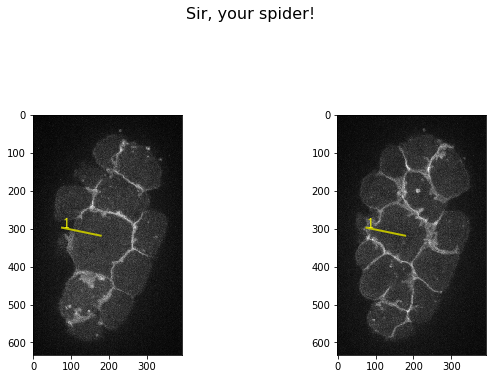

In [52]:
pylab.rcParams['figure.figsize'] = (10, 15)
fig = plt.figure()
ks.plot_spider_loc_on_images(fig,stack[1],flow)

# Compute Kymographs and Plot Data

In [53]:
len(ks.kymographs[0])

TypeError: object of type 'NoneType' has no len()

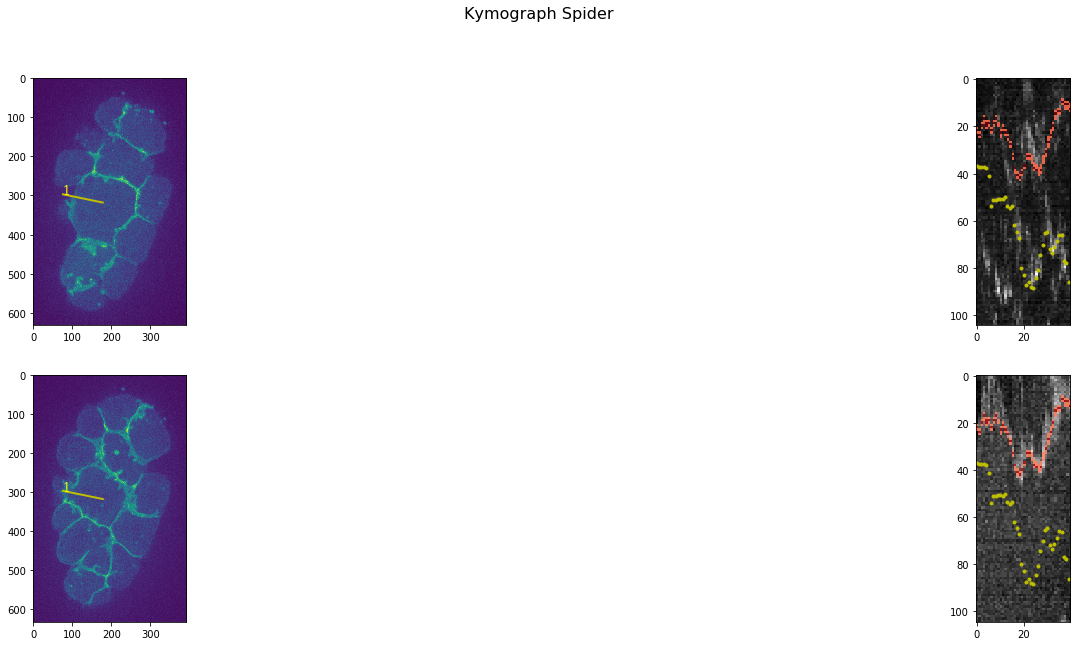

In [54]:
ks.compute(stack[0],stack[1],seg,flow)

# Plotting from here on...
pylab.rcParams['figure.figsize'] = (30, 10) # set figure size
fig = plt.figure()
ks.plot(fig,stack[1][0],stack[1][-1],15,True)

# Use the next line if you want to save the plot to disc
#fig.savefig('/Users/jug/Desktop/muh.png')

### Plotting column flow stats

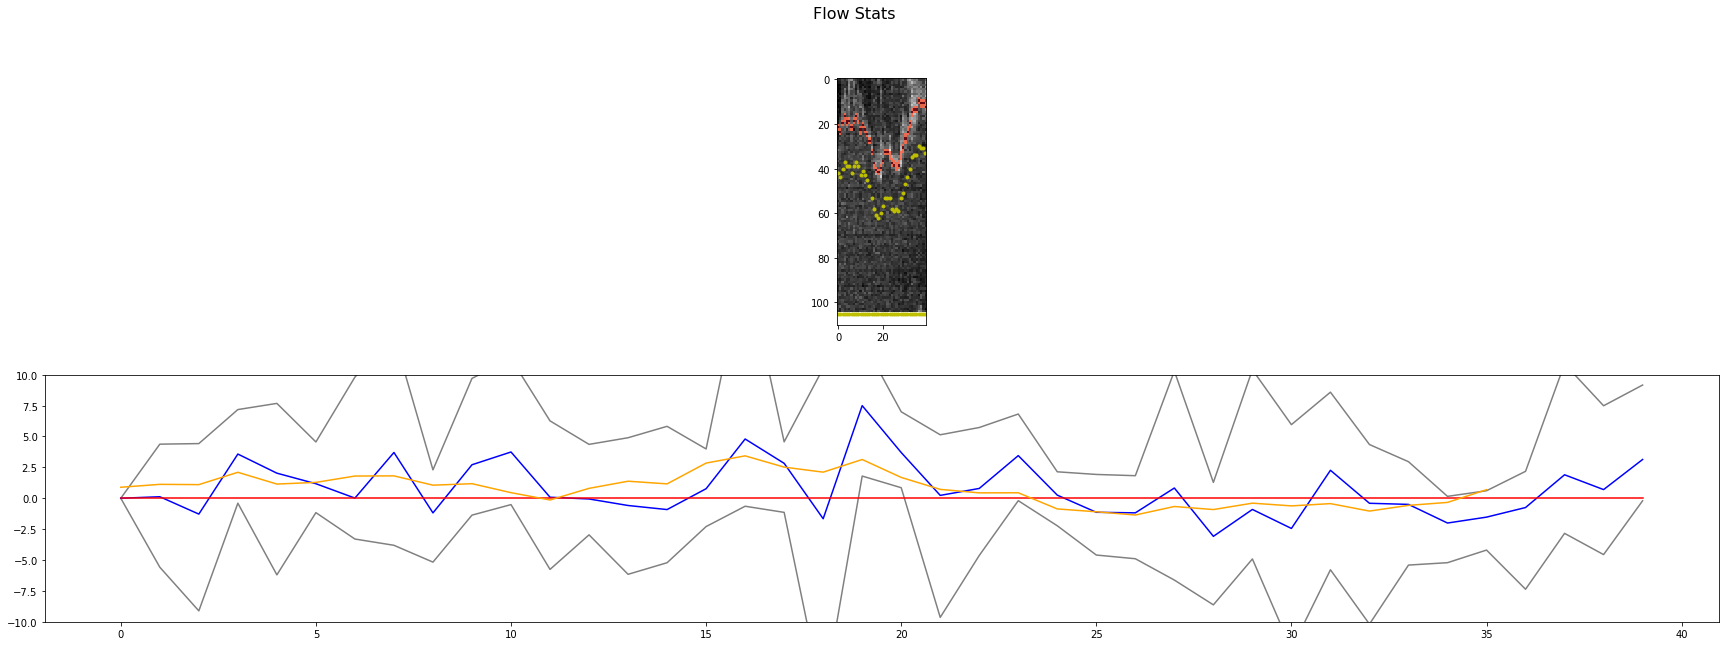

In [55]:
pylab.rcParams['figure.figsize'] = (30, 10) # set figure size
fig_stats = plt.figure()
ks.plot_column_flow_stats(fig_stats, offset_from_membrane=20, length=None)

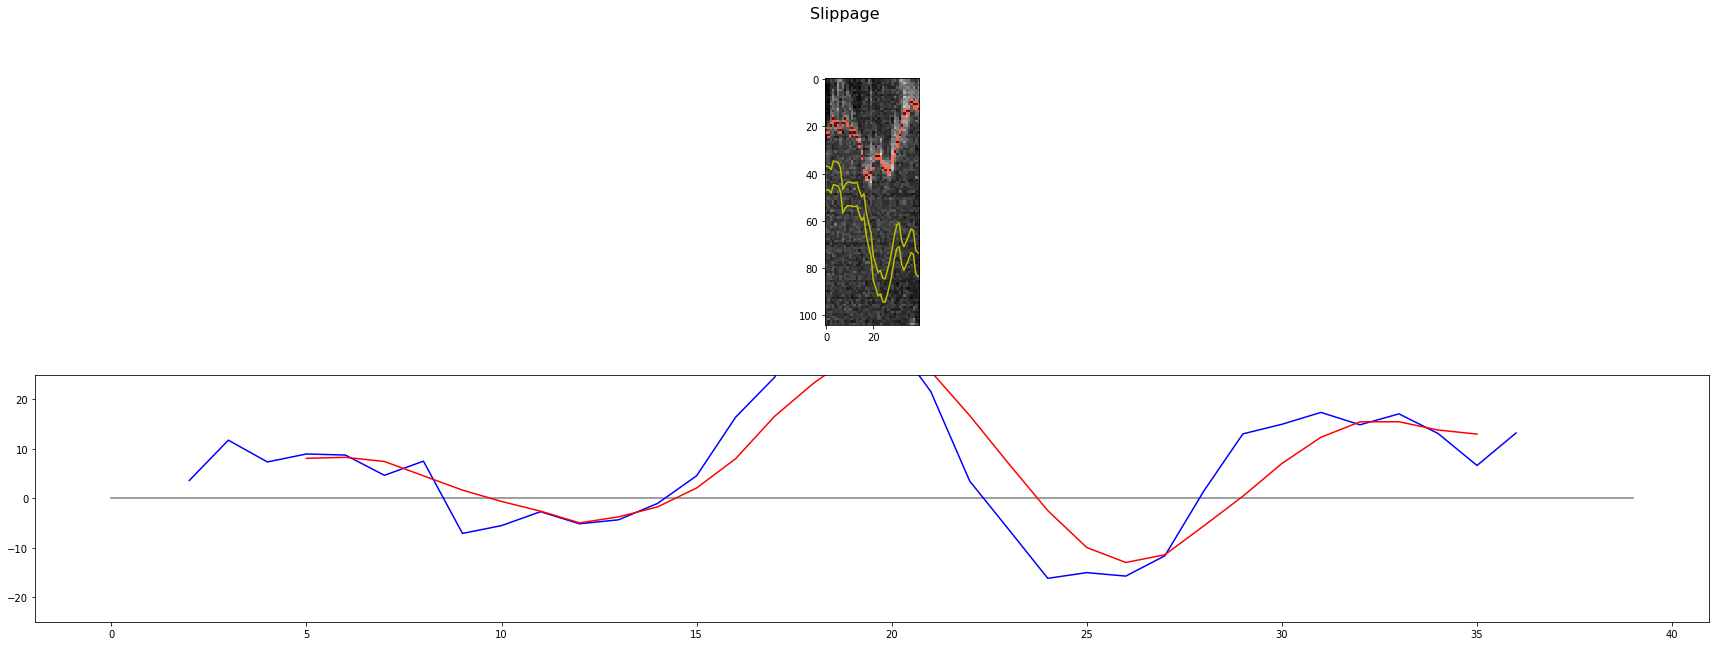

In [56]:
pylab.rcParams['figure.figsize'] = (30, 10) # set figure size
fig_slip = plt.figure()
(s, ss) = ks.plot_slippage(fig_slip, delta_t=5, offset_from_membrane=15, length=10, move_window=True, smoothing_width=5)

In [57]:
# get the y-values of the k-th legs blue line
k=0
s[k][1]

array([  3.59943666,  11.75237254,   7.34505017,   8.95614642,
         8.74239877,   4.63895904,   7.50699257,  -7.1198032 ,
        -5.53746662,  -2.71777366,  -5.16832956,  -4.35811839,
        -1.04309067,   4.54784303,  16.40237552,  24.48291226,
        38.56627552,  32.46653679,  32.38401212,  21.61502756,
         3.46346414,  -6.32981354, -16.2053801 , -15.05058466,
       -15.75085679, -11.64033229,   1.48053213,  13.03277816,
        14.97036195,  17.37186277,  14.86422472,  17.07883199,
        13.11150958,   6.62992438,  13.21322018])

In [59]:
k=0
print np.array(s[k][1]).mean()

7.06575712789


# Export data to CSV file

In [ ]:
data_filename = folder+'data.jug'
str_now = datetime.datetime.now().strftime("%B %d, %Y at %I:%M%p")

with open(data_filename, "w") as data_file:
    data_file.write("# Exported after processing '%s' on %s\n\n" % (filename,str_now))
    for t in range(len(frames)):
        data_file.write("t, %d\n"%t)
        data_file.write("c, %d, %d\n"%(centers[t][0],centers[t][1]))
        data_file.write("r, %d\n"%radii[t])
        polygone = polygones[t][0] # we will only export the first polygone here!
        for p in range(len(polygone)):
            #absolute point coordinates: 
            #  data_file.write("p%d, %d, %d\n"%(p,polygone[p][0],polygone[p][1]))
            data_file.write("p%d, %d, %d\n"%(p,polygone[p][0]-centers[t][0],polygone[p][1]-centers[t][1]))
        data_file.write("\n")